In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv('data/titanic_withEncoded.csv')

In [4]:
X = data.drop(columns=['Unnamed: 0', 'PassengerId', 'Survived'])
y = data['Survived']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1)

In [6]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [7]:
pca = PCA()
pca.fit(X_train_std)
X_pca = pca.transform(X_train_std)

<BarContainer object of 11 artists>

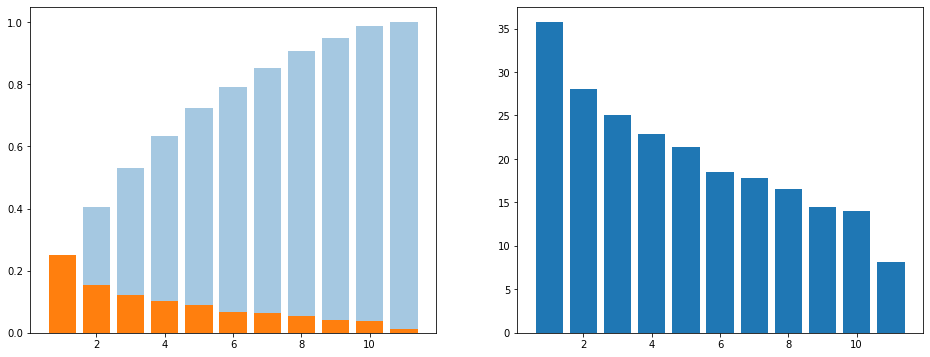

In [8]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(16, 6))

ax0.bar(range(1, pca.n_components_ + 1), np.cumsum(pca.explained_variance_ratio_), alpha=0.4)
ax0.bar(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_)

ax1.bar(range(1, pca.n_components_ + 1), pca.singular_values_)

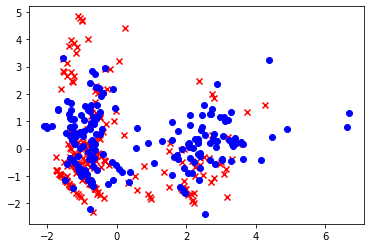

In [9]:
plt.scatter(X_pca[y_train == 0, 0], X_pca[y_train == 0, 1], color='r', marker='x')
plt.scatter(X_pca[y_train == 1, 0], X_pca[y_train == 1, 1], color='b', marker='o')